In [2]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
"""PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS"""

'PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS'

In [4]:
# Load the dataset using pandas
data = pd.read_csv("E:\\Neural Networks\\forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forest_fire = data.iloc[:,2:11]
forest_fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [7]:
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FFMC    517 non-null    float64
 1   DMC     517 non-null    float64
 2   DC      517 non-null    float64
 3   ISI     517 non-null    float64
 4   temp    517 non-null    float64
 5   RH      517 non-null    int64  
 6   wind    517 non-null    float64
 7   rain    517 non-null    float64
 8   area    517 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 36.5 KB


<AxesSubplot: >

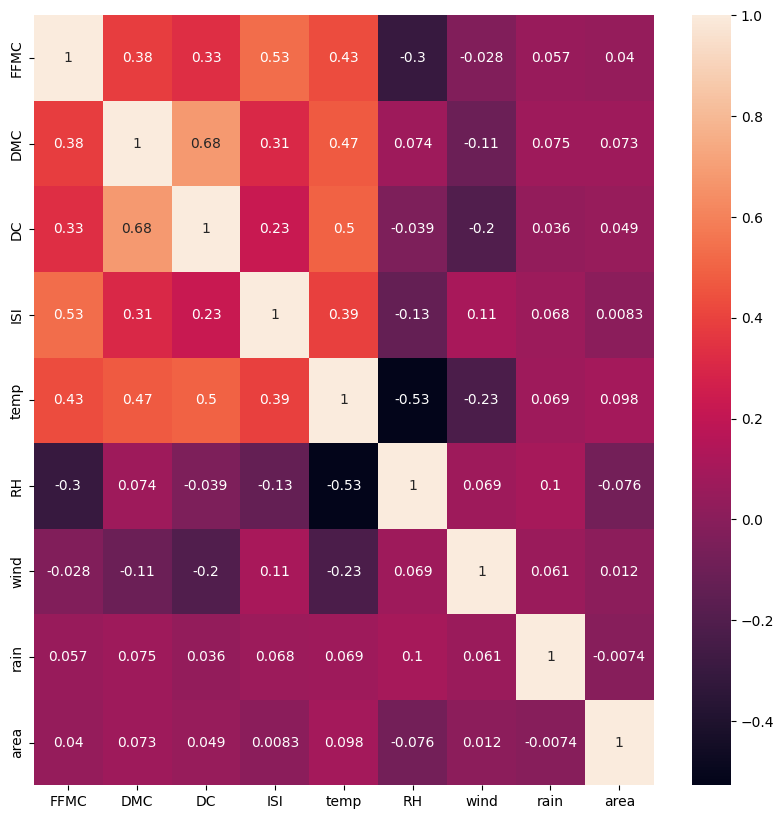

In [8]:
# plotting a correaltion heat map
corr = forest_fire[forest_fire.columns[0:11]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [13]:
num_columns = data.select_dtypes(exclude='object').columns.tolist()

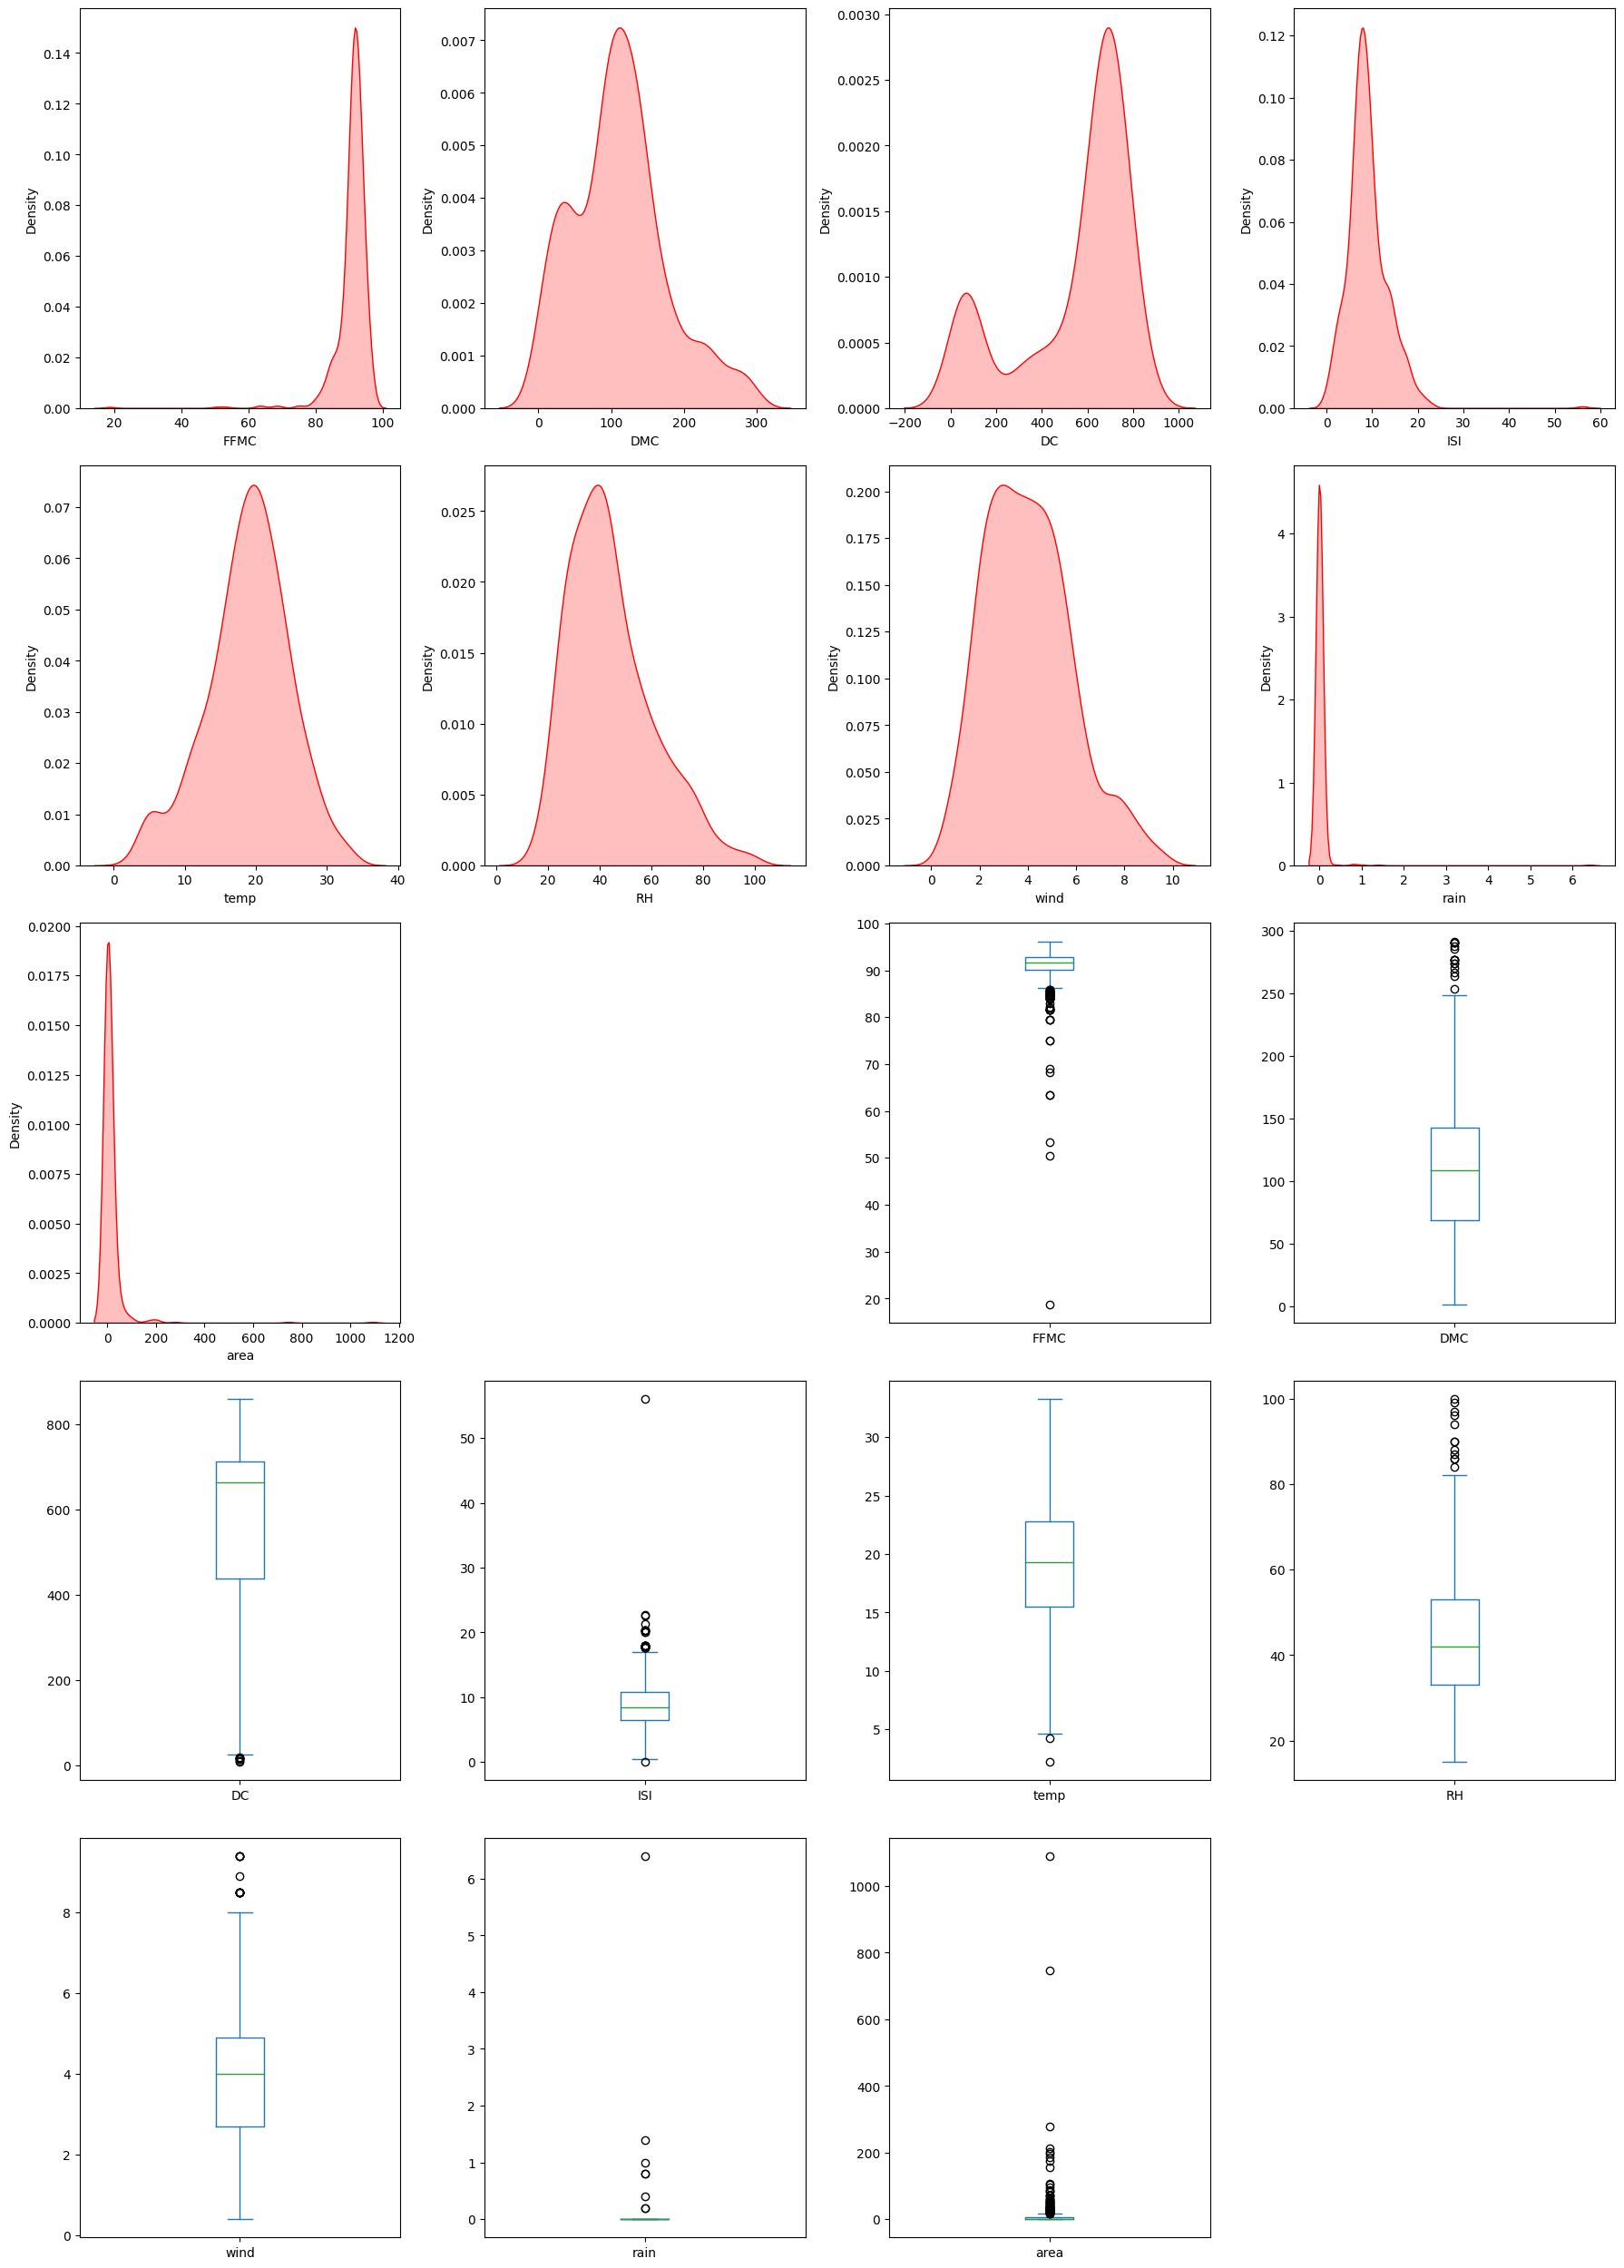

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='r',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [37]:
x = forest_fire
y = data['size_category']

In [38]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()

In [40]:
y_n = encoder.fit_transform(y)

In [41]:
y_n.dtype

dtype('int32')

In [42]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [43]:
# Initializing the ANN by calling the Sequential class from keras of Tensorflow
ann = models.Sequential([
    layers.Dense(20,activation = 'relu'),   # Adding "fully connected" INPUT layer to the Sequential ANN by calling Dense class and relu function
    layers.Dense(40,activation = 'relu'),   # Adding "fully connected" SECOND layer to the Sequential AMM by calling Dense class and relu function
    layers.Dense(1,activation = 'sigmoid')   # Number of Units = 1 and Activation Function = Linear
])

In [44]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy') # optimizer is the learning rate and adam defines the best learning rate

In [45]:
ann.fit(x,y_n,epochs=100)

Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 74.8873 - accuracy: 0.2689
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 7.2983 - accuracy: 0.6151
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 4.7312 - accuracy: 0.7582
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.8990 - accuracy: 0.6867
Epoch 5/100
17/17 [==============================] - 0s 1000us/step - loss: 0.5824 - accuracy: 0.7582
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8472
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8569
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8743
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8685
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8665
Epoch

In [46]:
ann.evaluate(x,y_n)

# got the best uaccuracy using the trail and error methon on epochs
# got the loss under limit only

17/17 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9787


[0.05076228827238083, 0.978723406791687]